In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
print(os.listdir("../input/cifar-100-python/cifar-100-python/"))

# Any results you write to the current directory are saved as output.

['cifar-100-python']
['train', 'test', 'meta', 'file.txt~']


# Bouding Boxes

In [18]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt

# Getting data from the human super class

In [19]:
file_path = '../input/cifar-100-python/cifar-100-python/'
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train = unpickle(file_path + 'train')
test = unpickle(file_path + 'test')

The CIFAR-100 dataset has 100 fine labels and 20 coarse labels. Since we only care about data where there are people in the image, we want to get rid of all the data where the coarse label does not equal 15, the people class. 

Loaded in this way, each of the batch files contains a dictionary with the following elements:
* data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
* labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

In [20]:
#Making a dico with both the training and test datasets
data = dict(train)
data.update(test)

Lets look at how this data is set up. 

In [21]:
data.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

So coarse labels contain the super classes for the CIFAR 100, dataset, the one of these we are interested in is people so we can select all of those and add them to a new array. 

In [22]:
labels = data[b'coarse_labels']
pics = data[b'data']
#pics.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
people = []
for i in range(0,len(labels)):
    if(labels[i] == 14): #Its a person
        people.append(pics[i])

# Having a look at our images

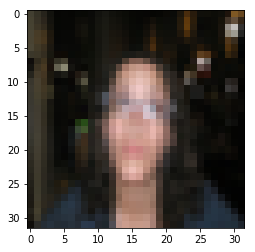

In [37]:
test_img = people[5].reshape(3,32,32) #4
# For some reason the channels get mixed up and the image needs transposing 
plt.imshow(np.transpose(test_img, (1, 2, 0)),interpolation='nearest')

# Looking at 10 of these images
We can see that some of them have faces as they are zoomed in. However some of the pictures like the above are so low quality and zoomed out that you cannot make out any facial features. 

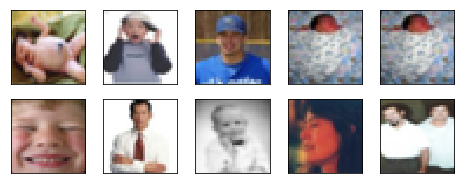

In [24]:
# Print 10 random images for 10 random classes 
fig = plt.figure(figsize=(8,3))
for i in range(10):
    num = np.random.randint(500)
    ax = fig.add_subplot(2,5,1 + i, xticks=[],yticks=[])
    img_num = np.random.randint(500)
    im = np.transpose(people[num].reshape(3,32,32), (1, 2, 0))
    plt.imshow(im)
plt.show()

In [31]:
%%bash
wget https://raw.githubusercontent.com/shantnu/FaceDetect/master/haarcascade_frontalface_default.xml

--2019-01-08 21:39:16--  https://raw.githubusercontent.com/shantnu/FaceDetect/master/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

     0K .......... .......... .......... .......... ..........  5% 1.76M 0s
    50K .......... .......... .......... .......... .......... 11% 5.39M 0s
   100K .......... .......... .......... .......... .......... 16% 12.0M 0s
   150K .......... .......... .......... .......... .......... 22% 5.82M 0s
   200K .......... .......... .......... .......... .......... 27% 8.29M 0s
   250K .......... .......... .......... .......... .......... 33% 7.80M 0s
   300K .......... .......... .......... .......... .......... 38% 9.74

In [32]:
%%bash 
ls

__notebook_source__.ipynb
haarcascade_frontalface_default.xml
haarcascade_frontalface_default.xml.1


Found 0 faces!


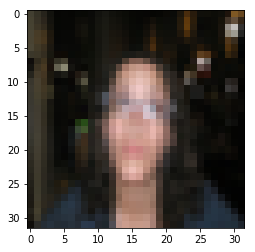

In [77]:
testImg = people[5].reshape(3,32,32)
testImg = np.transpose(test_img, (1, 2, 0))
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faceDetect(testImg)

In [76]:
def faceDetect(image):
    # Read the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1, #1.1
        minNeighbors=5,
        minSize=(5, 5),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    print("Found",len(faces),"faces!")
    if (len(faces) > 1):
        #Draw a rectangle around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    plt.imshow(image)

Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None


Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None
Found 0 faces!
None


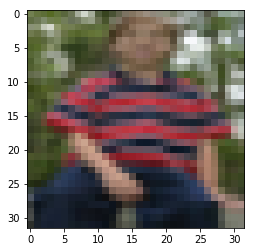

In [78]:
for i in range(0,len(people)):
    testImg = people[i].reshape(3,32,32)
    testImg = np.transpose(testImg, (1, 2, 0))
    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    print(faceDetect(testImg))

In [80]:
for i in range(0,len(people)):
    testImg = people[i].reshape(3,32,32)
    image = np.transpose(testImg, (1, 2, 0))
    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1, #1.1
        minNeighbors=5,
        minSize=(5, 5),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    if (len(faces) > 0):
        print(i,"Found",len(faces),"faces!")
        #Draw a rectangle around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

        plt.imshow(image)

86 Found 1 faces!


TypeError: Layout of the output array img is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)

Found 1 faces!


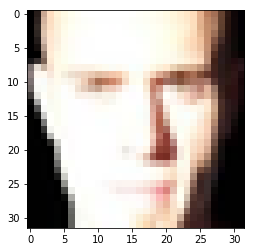

In [82]:
testImg = people[86].reshape(3,32,32)
testImg = np.transpose(testImg, (1, 2, 0))
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faceDetect(testImg)